In [33]:
import os
import numpy as np
from astropy.io import fits
from astropy.time import Time
import matplotlib.pyplot as plt
from astropy.table import Table

from matplotlib.colors import LinearSegmentedColormap
from pylab import *

parula_colors = np.load('/Users/arcticfox/parula_colors.npy', allow_pickle=True)

bkg_colors = []
cmap = cm.get_cmap('Greys', 3)
for i in range(cmap.N):
    rgb = cmap(i)[:3]
    bkg_colors.append(matplotlib.colors.rgb2hex(rgb))
bkg_colors = np.array(bkg_colors)

plt.rcParams['font.size'] = 16

plot_dir = '/Users/arcticfox/Documents/youngStars/veloce/plots/'

dat_tab = Table.read('/Users/arcticfox/Documents/youngStars/veloce/spectra/halpha_orders.tab',
                 format='ascii')
dat_dir = '/Users/arcticfox/Documents/youngStars/veloce/spectra/halpha_orders'
dat = np.sort([os.path.join(dat_dir, i) for i in os.listdir(dat_dir)])

master_log = Table.read('/Users/arcticfox/Documents/youngStars/veloce/master_log.tab',
                         format='ascii')

In [34]:
FLARE_TIME = 2163.0312247947904 + 2457000

In [35]:
tics = np.array(np.unique(dat_tab['TIC'])) + 0

In [36]:
subreg = np.arange(1300, 1600, 1, dtype=int)
x_subreg = np.arange(0,len(subreg),1)
area_width = np.arange(1420, 1471, 1, dtype=int)
x_width = np.arange(0,len(area_width),1)

In [37]:
test = dat_tab['Filename'][0].split('/')[1].split('.')[0]
print(test)
matching = [s for s in dat if test in s]
#matching

23nov30092


In [38]:
dat_tab

Date,TIC,Filename
str10,int64,str21
2020-11-23,146522418,201123/23nov30092.npy
2020-11-23,146522418,201123/23nov30093.npy
2020-11-23,146522418,201123/23nov30094.npy
2020-11-23,146522418,201123/23nov30095.npy
2020-11-23,146522418,201123/23nov30096.npy
2020-11-23,427346731,201123/23nov30098.npy
2020-11-23,427346731,201123/23nov30099.npy
2020-11-23,427346731,201123/23nov30100.npy
2020-11-23,427346731,201123/23nov30101.npy


No handles with labels found to put in legend.


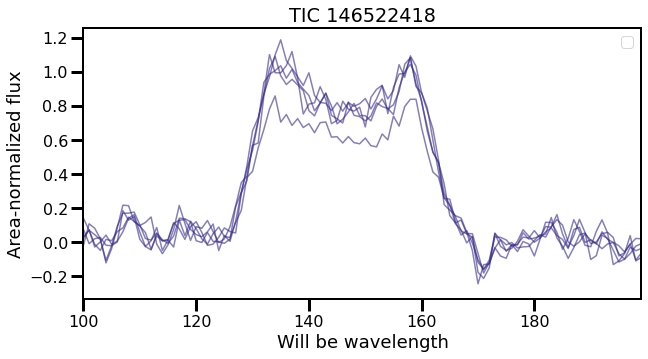

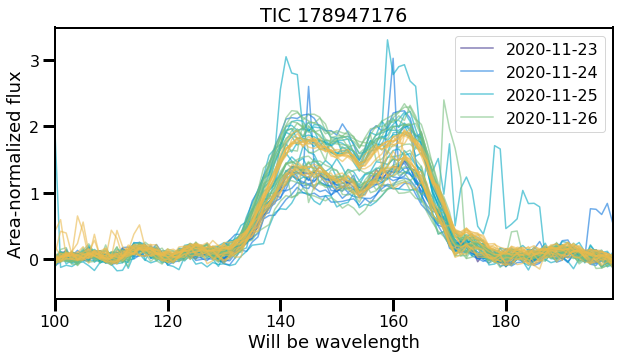

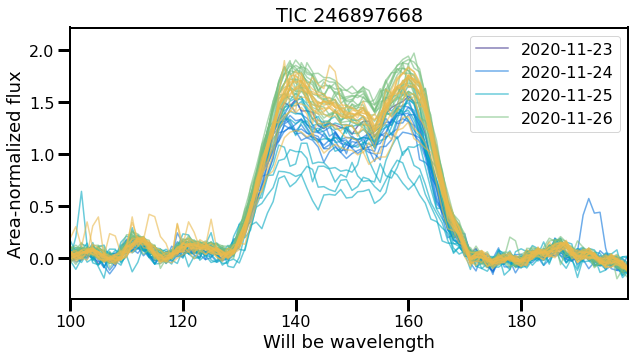

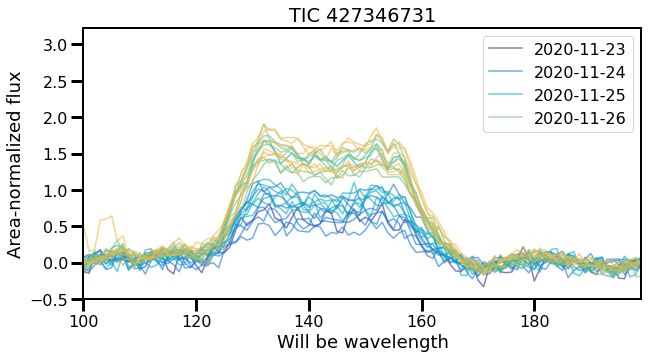

In [39]:
all_areas = []
#####################################
#### baseline should be 0, not 1 ####
#####################################
for tic in tics:
    areas = []
    
    subtab = dat_tab[dat_tab['TIC']==tic]
    submaster = master_log[master_log['ObjType']=='TIC{0}'.format(tic)]
    #fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5))
    fig, ax2 = plt.subplots(figsize=(10,5))
    color_inds = np.linspace(0, len(parula_colors)-2, 
                             len(np.unique(submaster['ObsDate']))+2, dtype=int)
    z = 0
    
    for i in range(len(subtab)):
        fn = subtab['Filename'][i].split('/')[-1].split('.')[0]

        newfn = [s for s in dat if fn in s][0]
        #print(newfn)
        flux = np.load(newfn, allow_pickle=True)

        norm_around_zero = flux - np.nanmedian(flux)
        area = np.trapz(norm_around_zero[area_width], 
                        x_width)
        areas.append(area)

        if submaster['ObsDate'][i] != submaster['ObsDate'][i-1]:
            ax2.plot(x_subreg, norm_around_zero[subreg],#/area, 
                 c=parula_colors[color_inds[z]], alpha=0.6, label=submaster['ObsDate'][i])
            z += 1
        else:
            ax2.plot(x_subreg, norm_around_zero[subreg],#/area, 
                 c=parula_colors[color_inds[z]], alpha=0.6)
        
        
    ax2.set_xlim(x_subreg[0]+100, x_subreg[-1]-100)
    #ax2.set_ylim(-0.02,0.06)
    #ax2.set_title('Night {}'.format(dates[n]))
    ax2.set_title('TIC {0}'.format(tic))
    ax2.legend()
    ax2.set_ylabel('Area-normalized flux', fontsize=18)
    ax2.set_xlabel('Will be wavelength', fontsize=18)

    all_areas.append(areas)
    #plt.savefig(os.path.join(plot_dir,'area_normalized_{}.png'.format(dates[n])), 
    #            dpi=200, rasterize=True, bbox_inches='tight')

In [29]:
subtab

Date,TIC,Filename
str10,int64,str35
2020-11-23,146522418,201123/23nov30092.npy
2020-11-23,146522418,201123/23nov30093.npy
2020-11-23,146522418,201123/23nov30094.npy
2020-11-23,146522418,201123/23nov30095.npy
2020-11-23,146522418,201123/23nov30096.npy


In [21]:
total_obs = len(nights[0]) + len(nights[1]) + len(nights[2])
color_inds = np.linspace(0, len(parula_colors)-2, total_obs, dtype=int)

z = 0
plt.figure(figsize=(14,4))
alphas = [1.0, 0.4, 0.75]

for n in range(len(nights)):
    
    for i in range(len(nights[n])):
        plt.plot(x[subreg] + (z*100), nights[n][i][subreg], 
                 c=parula_colors[color_inds[z]])
        if i == 0:
            start = x[subreg][100] + (z*100)
        if i == len(nights[n]) - 1:
            end = x[subreg][int(len(subreg)/1.5)] + (z*100)
            
        if n == 1 and i == 9:
            fstart = x[subreg][100] + (z*100)
            fend = x[subreg][int(len(subreg)/1.5)] + (z*100)
            plt.vlines((fend+fstart)/2.0, 0, 140, color='darkorange', lw=5,
                       alpha=0.7)
        
        z += 1
    plt.axvspan(start, end, color=bkg_colors[n], alpha=alphas[n]) 
    plt.text((end+start)/2.0-200, 4.6, dates[n])

plt.ylim(0.5,4.5)
plt.xlim(1300,7300)
plt.ylabel('Normalized flux')

#plt.savefig(os.path.join(plot_dir, 'all_together.png'), dpi=200,
#            rasterize=True, bbox_inches='tight')

NameError: name 'nights' is not defined

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(14,4))
i = 0

for ax in axes.reshape(-1):
    ax.plot(ALL_TIMES[i]-2457000, all_areas[i], 'ko')
    ax.set_title(dates[i])
    if i == 1:
        ax.set_xlabel('Time [JD - 2457000]', fontsize=18)
    if i == 0:
        ax.set_ylabel('H-alpha area', fontsize=18)
        
    ax.vlines(FLARE_TIME-2457000, 0, 140, color='darkorange', lw=5, alpha=0.7)
    ax.set_xticklabels([])
    if i != 0:
        ax.set_ylim(20, 70)
    else:
        ax.set_ylim(70,110)
    if i == 2:
        ax.set_yticklabels([])
    ax.set_xlim(ALL_TIMES[i][0]-0.01-2457000, ALL_TIMES[i][-1]+0.01-2457000)
    
    i += 1
plt.subplots_adjust(wspace=0.2)
plt.savefig(os.path.join(plot_dir, 'area_per_time.png'), dpi=200,
            rasterize=True, bbox_inches='tight')

In [ ]:
FLARE_TIME-2457000